In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Lectura del archivo original
eventsData = pd.read_csv(r"C:\Users\brian\OneDrive - fi.uba.ar\Escritorio\Facultad\Datos\Trabajo-Practico-1\dataset\train.csv",low_memory = False)

In [80]:
eventsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [81]:
eventsData.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


Analisis de aquellos que no tienen localizacion

In [82]:
sinKeyword = eventsData[eventsData['keyword'].isna()]

In [83]:
sinKeyword.describe()

,id,target
count,61.000000,61.000000
mean,5349.606557,0.688525
std,5459.902088,0.466940
min,1.000000,0.000000
25%,23.000000,0.000000
50%,44.000000,1.000000
75%,10852.000000,1.000000
max,10873.000000,1.000000


Demasiados pocos como para que tenga sentido analizarlo

Analisis de la distribucion del largo de los tweets verdaderos

In [84]:
#Creo una columna con la cantidad de palabras
eventsData['cantidadDePalabras'] = eventsData['text'].apply(lambda x: len(x.split()))

In [65]:
#Filtro por aquellos con target =1
eventsDataTarget1 = eventsData[eventsData['target'] ==1]

In [77]:
#Calculos de datos auxiliares necesarios para el grafico
desviacionEstandar = eventsDataTarget1['cantidadDePalabras'].std()
promedio = eventsDataTarget1['cantidadDePalabras'].mean()
cantidadDeValoresUnicos = (eventsDataTarget1['cantidadDePalabras'].unique()).shape[0]

29

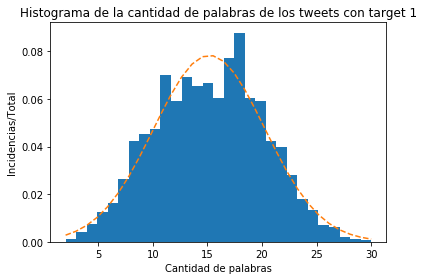

In [78]:
fig, ax = plt.subplots()
num_bins = cantidadDeValoresUnicos
n, bins, patches = ax.hist(eventsDataTarget1['cantidadDePalabras'], num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * desviacionEstandar)) *
     np.exp(-0.5 * (1 / desviacionEstandar * (bins - promedio))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Incidencias/Total')
ax.set_title('Histograma de la cantidad de palabras de los tweets con target == 1')

fig.tight_layout()
plt.show()

Ahora, se repetira el proceso, pero con aquellos con target == 0. Sinceramente no parece de mucha utilidad que sea una gaussiana.

In [86]:
#Filtro por aquellos con target =0
eventsDataTarget0 = eventsData[eventsData['target'] ==0]

In [87]:
#Calculos de datos auxiliares necesarios para el grafico
desviacionEstandar = eventsDataTarget1['cantidadDePalabras'].std()
promedio = eventsDataTarget1['cantidadDePalabras'].mean()
cantidadDeValoresUnicos = (eventsDataTarget1['cantidadDePalabras'].unique()).shape[0]

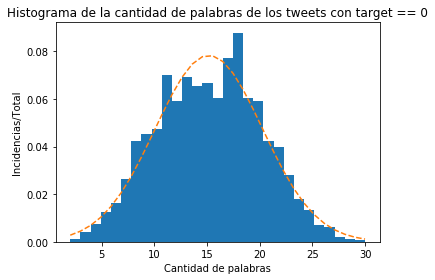

In [89]:
fig, ax = plt.subplots()
num_bins = cantidadDeValoresUnicos
n, bins, patches = ax.hist(eventsDataTarget1['cantidadDePalabras'], num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * desviacionEstandar)) *
     np.exp(-0.5 * (1 / desviacionEstandar * (bins - promedio))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Incidencias/Total')
ax.set_title('Histograma de la cantidad de palabras de los tweets con target == 0')

fig.tight_layout()
plt.show()